In [81]:
import sys
sys.path.append('..')

In [1]:
import matplotlib.pyplot as plt

data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

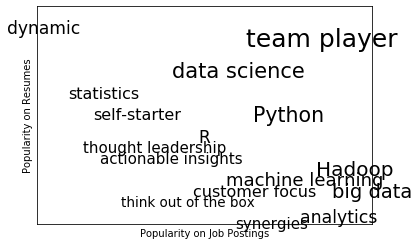

In [2]:
from matplotlib import pyplot as plt

def text_size(total: int) -> float:
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
             ha='center', va='center',
             size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([]);

# plt.show()
#plt.close()


In [42]:
def fix_unicode(text: str) -> str:
    return text.replace(u"’", "'")

import re
from bs4 import BeautifulSoup
import requests

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib') # need to install via conda

content = soup.find("div", "main-post-radar-content")   # find article-body div
regex = r"[\w']+|[\.]"                       # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [43]:
document

['Weâ',
 've',
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 'Oâ',
 'Reilly',
 'said',
 'that',
 'â',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'â',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'â',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'Join',
 'the',
 "O'Reilly",
 'online',
 'learning',
 'platform',
 '.',
 'Get',
 'a',
 'free',
 'trial',
 'today',
 'and',
 'find',
 'answers',
 'on',
 'the',
 'fly',
 'or',
 'master',
 'something',
 'new',
 'and',
 'useful',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'â',
 'data',
 'driven',
 'apps',
 '

In [44]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

In [45]:
def generate_using_bigrams() -> str:
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

In [46]:
generate_using_bigrams()

'It was ignored .'

In [47]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

In [48]:
def generate_using_trigrams() -> str:
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return " ".join(result)

In [49]:
generate_using_trigrams()

'The developers of CDDB realized that any CD had a unique signature based on the Web was the CDDB database .'

In [50]:
from typing import List, Dict

# Type alias to refer to grammars later
Grammar = Dict[str, List[str]]

grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

In [ ]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"

In [51]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        # If this is a terminal token, skip it.
        if is_terminal(token): continue

        # Otherwise, it's a non-terminal token,
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            # Replacement could be e.g. "_NP _VP", so we need to
            # split it on spaces and splice it in.
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)

    # If we get here we had all terminals and are done
    return tokens

In [52]:
def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

In [56]:
generate_sentence(grammar)

['Python', 'trains']

In [57]:
from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

In [58]:
def random_y_given_x(x: int) -> int:
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

In [59]:
def random_x_given_y(y: int) -> int:
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

In [ ]:
def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [60]:
def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [61]:
compare_distributions()

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(6, 9): [29, 36],
             (6, 11): [28, 24],
             (5, 9): [32, 24],
             (4, 5): [24, 33],
             (2, 4): [29, 24],
             (6, 12): [25, 27],
             (5, 7): [28, 30],
             (5, 11): [20, 23],
             (4, 8): [18, 31],
             (1, 6): [22, 25],
             (2, 3): [27, 27],
             (4, 6): [16, 21],
             (2, 5): [26, 34],
             (6, 7): [25, 32],
             (6, 8): [35, 26],
             (5, 6): [27, 27],
             (1, 2): [31, 29],
             (1, 4): [33, 27],
             (3, 5): [40, 28],
             (1, 3): [27, 24],
             (3, 6): [21, 38],
             (1, 5): [24, 35],
             (3, 8): [19, 19],
             (2, 7): [39, 23],
             (5, 8): [24, 35],
             (3, 9): [36, 29],
             (2, 8): [29, 29],
             (2, 6): [31, 33],
             (6, 10): [37, 21],
             (3, 7): [

In [62]:
def sample_from(weights: List[float]) -> int:
    """returns i with probability weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()      # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                       # return the smallest i such that
        if rnd <= 0: return i          # weights[0] + ... + weights[i] >= rnd

In [63]:
from collections import Counter

# Draw 1000 times and count
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))
assert 10 < draws[0] < 190   # should be ~10%, this is a really loose test
assert 10 < draws[1] < 190   # should be ~10%, this is a really loose test
assert 650 < draws[2] < 950  # should be ~80%, this is a really loose test
assert draws[0] + draws[1] + draws[2] == 1000

In [64]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [65]:
K = 4

# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]

# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]

# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]

# a list of numbers, one for each document
document_lengths = [len(document) for document in documents]

distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

D = len(documents)

In [66]:
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    The fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)
    """
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    The fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)
    """
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

In [67]:
def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document,
    return the weight for the kth topic
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

In [75]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [76]:
import tqdm

for iter in tqdm.trange(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

100%|██████████| 1000/1000 [00:00<00:00, 2752.49it/s]


In [77]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)
    print('-'*30)

0 regression 4
0 libsvm 4
0 machine learning 4
0 neural networks 4
0 scikit-learn 2
0 probability 2
0 Mahout 2
0 mathematics 2
0 support vector machines 1
0 deep learning 1
0 decision trees 1
------------------------------
1 Postgres 4
1 MongoDB 4
1 Cassandra 2
1 MySQL 2
1 artificial intelligence 2
1 C++ 2
1 databases 1
1 support vector machines 1
------------------------------
2 Java 6
2 HBase 6
2 Big Data 6
2 Hadoop 4
2 Cassandra 2
2 C++ 2
2 artificial intelligence 2
2 NoSQL 2
2 Spark 2
2 Storm 2
2 Haskell 2
2 programming languages 2
2 MapReduce 2
2 databases 1
------------------------------
3 Python 8
3 R 8
3 statistics 6
3 probability 4
3 pandas 4
3 statsmodels 4
3 deep learning 3
3 theory 2
3 regression 2
3 scipy 2
3 scikit-learn 2
3 numpy 2
3 decision trees 1
------------------------------


In [78]:
topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

In [79]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
databases 14

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 6
databases 4

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
machine learning 12

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 10

['machine learning', 'regression', 'decision trees', 'libsvm']
Big Data and programming languages 7
machine learning 1

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 8
machine learning 4

['statistics', 'probability', 'mathematics', 'theory']
machine learning 5
Big Data and programming languages 3

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Big Data and programming languages 8

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
databases 4
machine learning 2
Big Data and programming languages 2

['Hadoop', 'Java', 'MapReduce', 'Big Data']
databases 8

['statistics', 

In [82]:
from scratch.linear_algebra import dot, Vector
import math

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

assert cosine_similarity([1., 1, 1], [2., 2, 2]) == 1, "same direction"
assert cosine_similarity([-1., -1], [2., 2]) == -1,    "opposite direction"
assert cosine_similarity([1., 0], [0., 1]) == 0,       "orthogonal"

In [84]:
colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

def make_sentence() -> str:
    return " ".join([
        "The",
        random.choice(colors),
        random.choice(nouns),
        random.choice(verbs),
        random.choice(adverbs),
        random.choice(adjectives),
        "."
    ])

NUM_SENTENCES = 50

random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

In [85]:
sentences[:3]

['The yellow cat is extremely hard .',
 'The yellow boat was extremely fast .',
 'The black car was quite slow .']

In [86]:
from scratch.deep_learning import Tensor

class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}  # mapping word -> word_id
        self.i2w: Dict[int, str] = {}  # mapping word_id -> word

        for word in (words or []):     # If words were provided,
            self.add(word)             # add them.

    @property
    def size(self) -> int:
        """how many words are in the vocabulary"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:        # If the word is new to us:
            word_id = len(self.w2i)     # Find the next id.
            self.w2i[word] = word_id    # Add to the word -> word_id map.
            self.i2w[word_id] = word    # Add to the word_id -> word map.

    def get_id(self, word: str) -> int:
        """return the id of the word (or None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """return the word with the given id (or None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"

        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

vocab = Vocabulary(["a", "b", "c"])
assert vocab.size == 3,              "there are 3 words in the vocab"
assert vocab.get_id("b") == 1,       "b should have word_id 1"
assert vocab.one_hot_encode("b") == [0, 1, 0]
assert vocab.get_id("z") is None,    "z is not in the vocab"
assert vocab.get_word(2) == "c",     "word_id 2 should be c"
vocab.add("z")
assert vocab.size == 4,              "now there are 4 words in the vocab"
assert vocab.get_id("z") == 3,       "now z should have id 3"
assert vocab.one_hot_encode("z") == [0, 0, 0, 1]

In [87]:
import json

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as f:
        json.dump(vocab.w2i, f)       # Only need to save w2i

def load_vocab(filename: str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Load w2i and generate i2w from it.
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}
    return vocab

In [88]:
from typing import Iterable
from scratch.deep_learning import Layer, Tensor, random_tensor, zeros_like

class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # One vector of size embedding_dim for each desired embedding
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # Save last input id
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """Just select the embedding vector corresponding to the input id"""
        self.input_id = input_id    # remember for use in backpropagation

        return self.embeddings[input_id]

    def backward(self, gradient: Tensor) -> None:
        # Zero out the gradient corresponding to the last input.
        # This is way cheaper than creating a new all-zero tensor each time.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]

In [99]:
class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Call the superclass constructor
        super().__init__(vocab.size, embedding_dim)

        # And hang onto the vocab
        self.vocab = vocab

    def __getitem__(self, word: str) -> Tensor:
        word_id = self.vocab.get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Returns the n closest words based on cosine similarity"""
        vector = self[word]

        # Compute pairs (similarity, other_word), and sort most similar first
        scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
                  for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]

In [95]:
import re

# This is not a great regex, but it works on our data.
tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower())
                       for sentence in sentences]

tokenized_sentences[:3]

[['the', 'yellow', 'cat', 'is', 'extremely', 'hard', '.'],
 ['the', 'yellow', 'boat', 'was', 'extremely', 'fast', '.'],
 ['the', 'black', 'car', 'was', 'quite', 'slow', '.']]

In [96]:
# Create a vocabulary (that is, a mapping word -> word_id) based on our text.
vocab = Vocabulary(word
                   for sentence_words in tokenized_sentences
                   for word in sentence_words)

In [97]:
from scratch.deep_learning import Tensor, one_hot_encode

inputs: List[int] = []
targets: List[Tensor] = []

for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):          # For each word
        for j in [i - 2, i - 1, i + 1, i + 2]:   # take the nearby locations
            if 0 <= j < len(sentence):           # that aren't out of bounds
                nearby_word = sentence[j]        # and get those words.

                # Add an input that's the original word_id
                inputs.append(vocab.get_id(word))

                # Add a target that's the one-hot-encoded nearby word
                targets.append(vocab.one_hot_encode(nearby_word))

In [100]:
# Model for learning word vectors

from scratch.deep_learning import Sequential, Linear

random.seed(0)
EMBEDDING_DIM = 5  # seems like a good size

# Define the embedding layer separately, so we can reference it.
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM)

model = Sequential([
    # Given a word (as a vector of word_ids), look up its embedding.
    embedding,
    # And use a linear layer to compute scores for "nearby words".
    Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
])

In [101]:
# Train the word vector model

from scratch.deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent

loss = SoftmaxCrossEntropy()
optimizer = GradientDescent(learning_rate=0.01)

for epoch in range(100):
    epoch_loss = 0.0
    for input, target in zip(inputs, targets):
        predicted = model.forward(input)
        epoch_loss += loss.loss(predicted, target)
        gradient = loss.gradient(predicted, target)
        model.backward(gradient)
        optimizer.step(model)
    print(epoch, epoch_loss)            # Print the loss
    print(embedding.closest("black"))   # and also a few nearest words
    print(embedding.closest("slow"))    # so we can see what's being
    print(embedding.closest("car"))     # learned.

0 2970.156429387063
[(1.0, 'black'), (0.7927247753692507, 'blue'), (0.5911733314896048, 'cat'), (0.5716654981660781, 'the'), (0.3026892975059721, 'car')]
[(1.0, 'slow'), (0.8936272640937163, 'green'), (0.5272141409772461, '.'), (0.356013304388346, 'yellow'), (0.29982973123116025, 'blue')]
[(1.0, 'car'), (0.7030889033452818, 'cat'), (0.519105254858335, 'fast'), (0.4236692673437953, 'very'), (0.3848186865089063, 'quite')]
1 2865.855510833289
[(1.0, 'black'), (0.8076054877794636, 'blue'), (0.6112459000264461, 'cat'), (0.5676562111596322, 'the'), (0.3273307461476133, 'car')]
[(1.0, 'slow'), (0.8795208130766505, 'green'), (0.5675261127213351, '.'), (0.3624106663078739, 'yellow'), (0.3593451263736934, 'boat')]
[(1.0, 'car'), (0.7121322616680856, 'cat'), (0.49717481866583696, 'fast'), (0.4099921723101964, 'very'), (0.3655326707405854, 'quite')]
2 2815.035526656466
[(1.0, 'black'), (0.8240340241906855, 'blue'), (0.6310891601317347, 'cat'), (0.5448895203899405, 'the'), (0.3541498544488745, 'car

20 2504.5902126634855
[(1.0, 'black'), (0.957576053669443, 'blue'), (0.6754448002775353, 'yellow'), (0.6741016113281827, 'red'), (0.6370593374009473, 'cat')]
[(1.0, 'slow'), (0.8669876605786818, 'hard'), (0.7898461908470058, 'soft'), (0.7431142187795304, 'fast'), (0.6054838693034813, 'quite')]
[(1.0, 'car'), (0.830931467759428, 'cat'), (0.415779665564591, 'black'), (0.29504497385830886, 'bed'), (0.2599269198648533, 'blue')]
21 2498.7143878987954
[(1.0, 'black'), (0.9603082452264211, 'blue'), (0.6842899903173367, 'yellow'), (0.6819036185885785, 'red'), (0.6116210913792692, 'cat')]
[(1.0, 'slow'), (0.8684111458357192, 'hard'), (0.7920822233410272, 'soft'), (0.7524810526902486, 'fast'), (0.60966283727175, 'quite')]
[(1.0, 'car'), (0.8415691158802515, 'cat'), (0.40780015696694516, 'black'), (0.3138234920502817, 'bed'), (0.25269520607105733, 'blue')]
22 2493.3795337812226
[(1.0, 'black'), (0.9627876259396502, 'blue'), (0.6923235655936573, 'yellow'), (0.688776059426579, 'red'), (0.6074183601

40 2445.435059175928
[(1.0, 'black'), (0.9830297405543988, 'blue'), (0.7715406719568229, 'yellow'), (0.7326795304623552, 'red'), (0.7208372338967363, 'green')]
[(1.0, 'slow'), (0.880458120067408, 'hard'), (0.8195147526151283, 'fast'), (0.8130554630744778, 'soft'), (0.619364419895574, 'quite')]
[(1.0, 'car'), (0.9239812945585651, 'cat'), (0.5021638639789022, 'bed'), (0.33274820086160034, 'black'), (0.32542179659037174, 'boat')]
41 2443.829764277178
[(1.0, 'black'), (0.983464432461102, 'blue'), (0.7745235202523253, 'yellow'), (0.7332236523136185, 'red'), (0.7249861567247888, 'green')]
[(1.0, 'slow'), (0.8802945185856285, 'hard'), (0.8210468443982982, 'fast'), (0.8132308941749021, 'soft'), (0.6173126954708409, 'quite')]
[(1.0, 'car'), (0.9253402525533303, 'cat'), (0.508565933366239, 'bed'), (0.34445305702652784, 'boat'), (0.32992612157974543, 'black')]
42 2442.264295734095
[(1.0, 'black'), (0.9838638984531365, 'blue'), (0.7774574283509824, 'yellow'), (0.7336909797999466, 'red'), (0.729009

60 2420.50423862855
[(1.0, 'black'), (0.9870290148847188, 'blue'), (0.8228741772663024, 'yellow'), (0.7865738299248012, 'green'), (0.7345677788547075, 'red')]
[(1.0, 'slow'), (0.8750945811724075, 'hard'), (0.8496294491509622, 'fast'), (0.8194974712260716, 'soft'), (0.5439055883980406, 'quite')]
[(1.0, 'car'), (0.9139163013482305, 'cat'), (0.6253693669470443, 'bed'), (0.5730029937205456, 'boat'), (0.2750839508282446, 'black')]
61 2419.6331284472
[(1.0, 'black'), (0.9870424596759124, 'blue'), (0.8249545122095631, 'yellow'), (0.7891568805009258, 'green'), (0.7343896315578983, 'red')]
[(1.0, 'slow'), (0.8749303787807923, 'hard'), (0.8510900865311669, 'fast'), (0.820095253573745, 'soft'), (0.5390612083392912, 'quite')]
[(1.0, 'car'), (0.9120436024931774, 'cat'), (0.6314955914156292, 'bed'), (0.5791069377111726, 'boat'), (0.2727106491632456, 'black')]
62 2418.793380927998
[(1.0, 'black'), (0.9870430134663619, 'blue'), (0.8269848641569835, 'yellow'), (0.7916876199885123, 'green'), (0.73419961

80 2408.2135766837687
[(1.0, 'black'), (0.9854148512712751, 'blue'), (0.8552991079179563, 'yellow'), (0.8293099393854019, 'green'), (0.7292971266782377, 'red')]
[(1.0, 'slow'), (0.8768065331415692, 'hard'), (0.8751113979543326, 'fast'), (0.8349419301515193, 'soft'), (0.4548517851914831, 'quite')]
[(1.0, 'car'), (0.8785236145922343, 'cat'), (0.7356350107537113, 'bed'), (0.6566202589236835, 'boat'), (0.24149321116017008, 'black')]
81 2407.8320561830847
[(1.0, 'black'), (0.9852615735169723, 'blue'), (0.8564474543662007, 'yellow'), (0.8310084376448679, 'green'), (0.728948475434552, 'red')]
[(1.0, 'slow'), (0.8771346630632106, 'hard'), (0.8761277442755064, 'fast'), (0.8357997951621016, 'soft'), (0.45118016433895547, 'quite')]
[(1.0, 'car'), (0.8770581043441025, 'cat'), (0.7400342517800104, 'bed'), (0.6594825896382431, 'boat'), (0.24043209753230402, 'black')]
82 2407.467383082228
[(1.0, 'black'), (0.9851043112165103, 'blue'), (0.8575554595630773, 'yellow'), (0.8326706354710247, 'green'), (0.

In [104]:
# Explore most similar words

pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
         for w1 in vocab.w2i
         for w2 in vocab.w2i
         if w1 < w2]
pairs.sort(reverse=True)
for pair in pairs[:5]:
    print(pair)

(0.9948304450324577, 'bed', 'cat')
(0.9920899253848235, 'seems', 'was')
(0.9883988811665566, 'bed', 'boat')
(0.9821293900663808, 'black', 'blue')
(0.9709525703302305, 'green', 'red')


dv: 43.206: 100%|██████████| 100/100 [00:00<00:00, 1495.41it/s]


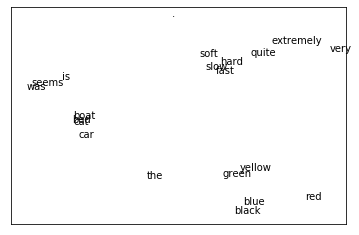

In [105]:
# Plot word vectors
#plt.close()

from scratch.working_with_data import pca, transform
import matplotlib.pyplot as plt

# Extract the first two principal components and transform the word vectors
components = pca(embedding.embeddings, 2)
transformed = transform(embedding.embeddings, components)

# Scatter the points (and make them white so they're "invisible")
fig, ax = plt.subplots()
ax.scatter(*zip(*transformed), marker='.', color='w')

# Add annotations for each word at its transformed location
for word, idx in vocab.w2i.items():
    ax.annotate(word, transformed[idx])

# And hide the axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# plt.show()

#plt.savefig('im/word_vectors')
#plt.gca().clear()
#plt.close()


In [106]:
from scratch.deep_learning import tensor_apply, tanh

class SimpleRnn(Layer):
    """Just about the simplest possible recurrent layer."""
    def __init__(self, input_dim: int, hidden_dim: int) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.w = random_tensor(hidden_dim, input_dim, init='xavier')
        self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
        self.b = random_tensor(hidden_dim)

        self.reset_hidden_state()

    def reset_hidden_state(self) -> None:
        self.hidden = [0 for _ in range(self.hidden_dim)]

    def forward(self, input: Tensor) -> Tensor:
        self.input = input              # Save both input and previous
        self.prev_hidden = self.hidden  # hidden state to use in backprop.

        a = [(dot(self.w[h], input) +           # weights @ input
              dot(self.u[h], self.hidden) +     # weights @ hidden
              self.b[h])                        # bias
             for h in range(self.hidden_dim)]

        self.hidden = tensor_apply(tanh, a)  # Apply tanh activation
        return self.hidden                   # and return the result.

    def backward(self, gradient: Tensor):
        # Backpropagate through the tanh
        a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
                  for h in range(self.hidden_dim)]

        # b has the same gradient as a
        self.b_grad = a_grad

        # Each w[h][i] is multiplied by input[i] and added to a[h],
        # so each w_grad[h][i] = a_grad[h] * input[i]
        self.w_grad = [[a_grad[h] * self.input[i]
                        for i in range(self.input_dim)]
                       for h in range(self.hidden_dim)]

        # Each u[h][h2] is multiplied by hidden[h2] and added to a[h],
        # so each u_grad[h][h2] = a_grad[h] * prev_hidden[h2]
        self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                        for h2 in range(self.hidden_dim)]
                       for h in range(self.hidden_dim)]

        # Each input[i] is multiplied by every w[h][i] and added to a[h],
        # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
        return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
                for i in range(self.input_dim)]

    def params(self) -> Iterable[Tensor]:
        return [self.w, self.u, self.b]

    def grads(self) -> Iterable[Tensor]:
        return [self.w_grad, self.u_grad, self.b_grad]

In [116]:
from bs4 import BeautifulSoup
import requests

url = "https://www.ycombinator.com/topcompanies/"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# We get the companies twice, so use a set comprehension to deduplicate.
companies = list({b.text
                  for b in soup("b")
                  if "h4" in b.get("class", ())})
assert len(companies) == 102 # changed from 101
companies[:10]

['Fivestars',
 'Rappi',
 'Newfront',
 'Rigetti Computing',
 'Meesho',
 'Mixpanel',
 'Boom Supersonic',
 'Fivetran',
 'GrubMarket Inc',
 'Lever']

In [112]:
vocab = Vocabulary([c for company in companies for c in company])

START = "^"
STOP = "$"

# We need to add them to the vocabulary too.
vocab.add(START)
vocab.add(STOP)

In [113]:
HIDDEN_DIM = 32  # You should experiment with different sizes!

rnn1 =  SimpleRnn(input_dim=vocab.size, hidden_dim=HIDDEN_DIM)
rnn2 =  SimpleRnn(input_dim=HIDDEN_DIM, hidden_dim=HIDDEN_DIM)
linear = Linear(input_dim=HIDDEN_DIM, output_dim=vocab.size)

model = Sequential([
    rnn1,
    rnn2,
    linear
])

In [114]:
from scratch.deep_learning import softmax

def generate(seed: str = START, max_len: int = 50) -> str:
    rnn1.reset_hidden_state()  # Reset both hidden states.
    rnn2.reset_hidden_state()
    output = [seed]            # Start the output with the specified seed.

    # Keep going until we produce the STOP character or reach the max length
    while output[-1] != STOP and len(output) < max_len:
        # Use the last character as the input
        input = vocab.one_hot_encode(output[-1])

        # Generate scores using the model
        predicted = model.forward(input)

        # Convert them to probabilities and draw a random char_id
        probabilities = softmax(predicted)
        next_char_id = sample_from(probabilities)

        # Add the corresponding char to our output
        output.append(vocab.get_word(next_char_id))

    # Get rid of START and END characters and return the word.
    return ''.join(output[1:-1])

In [115]:
loss = SoftmaxCrossEntropy()
optimizer = Momentum(learning_rate=0.01, momentum=0.9)

for epoch in range(300):
    random.shuffle(companies)  # Train in a different order each epoch.
    epoch_loss = 0             # Track the loss.
    for company in tqdm.tqdm(companies):
        rnn1.reset_hidden_state()  # Reset both hidden states.
        rnn2.reset_hidden_state()
        company = START + company + STOP   # Add START and STOP characters.

        # The rest is just our usual training loop, except that the inputs
        # and target are the one-hot-encoded previous and next characters.
        for prev, next in zip(company, company[1:]):
            input = vocab.one_hot_encode(prev)
            target = vocab.one_hot_encode(next)
            predicted = model.forward(input)
            epoch_loss += loss.loss(predicted, target)
            gradient = loss.gradient(predicted, target)
            model.backward(gradient)
            optimizer.step(model)

    # Each epoch print the loss and also generate a name
    print(epoch, epoch_loss, generate())

    # Turn down the learning rate for the last 100 epochs.
    # There's no principled reason for this, but it seems to work.
    if epoch == 200:
        optimizer.lr *= 0.1

  3%|▎         | 3/102 [00:00<00:03, 27.26it/s]

0 3421.6500028563405  ssidXEyppM oe


  2%|▏         | 2/102 [00:00<00:05, 19.98it/s]

1 3312.4845846122253  mo


  2%|▏         | 2/102 [00:00<00:05, 17.23it/s]

2 3240.380048958969 dXru


  2%|▏         | 2/102 [00:00<00:05, 18.67it/s]

3 3182.9909747141496 Crccgacdc


  3%|▎         | 3/102 [00:00<00:04, 24.46it/s]

4 3136.104473918439 ySvEeP


  2%|▏         | 2/102 [00:00<00:05, 18.74it/s]

5 3108.6583360411178 aA(


  4%|▍         | 4/102 [00:00<00:03, 26.54it/s]

6 3085.470230859239 fer


  3%|▎         | 3/102 [00:00<00:03, 27.43it/s]

7 3061.581243384963 Mta


  2%|▏         | 2/102 [00:00<00:05, 18.26it/s]

8 3044.114617498073 HaiksotpzsngtRbs(en nIn kerM


  3%|▎         | 3/102 [00:00<00:03, 29.47it/s]

9 3022.2657841341556 Nsdcn y


  3%|▎         | 3/102 [00:00<00:03, 26.36it/s]

10 3004.306895723402 PsypraasucNavnnaot


  0%|          | 0/102 [00:00<?, ?it/s]

11 2982.50181279609 (Mntdbyosdsn a


  3%|▎         | 3/102 [00:00<00:03, 26.42it/s]

12 2967.1127614862608 WnC(Ni


  3%|▎         | 3/102 [00:00<00:03, 26.39it/s]

13 2952.3657254359414 .ipzehn


  3%|▎         | 3/102 [00:00<00:03, 26.09it/s]

14 2939.618112821695 MrtOll


  4%|▍         | 4/102 [00:00<00:03, 31.06it/s]

15 2924.392592785195 AnbBrrr.sci


  2%|▏         | 2/102 [00:00<00:05, 16.95it/s]

16 2908.321903590838 Goreuobii


  3%|▎         | 3/102 [00:00<00:04, 23.92it/s]

17 2897.7897635471504 PpuloZ


  0%|          | 0/102 [00:00<?, ?it/s]

18 2885.2787754401556 Moetmaan


  2%|▏         | 2/102 [00:00<00:09, 10.66it/s]

19 2873.001383635547 Muepob


  2%|▏         | 2/102 [00:00<00:05, 19.10it/s]

20 2848.851137358321 Aotioxe


  2%|▏         | 2/102 [00:00<00:06, 16.51it/s]

21 2839.09645573295 Mhrkar


  2%|▏         | 2/102 [00:00<00:06, 15.52it/s]

22 2826.8905065305985 Saln Pa IriAn


  1%|          | 1/102 [00:00<00:10,  9.77it/s]

23 2810.17465137282 HargeX


  3%|▎         | 3/102 [00:00<00:04, 20.96it/s]

24 2800.45505193565 RvuoXied


  3%|▎         | 3/102 [00:00<00:04, 24.23it/s]

25 2785.443802142358 Set rta


  3%|▎         | 3/102 [00:00<00:03, 28.65it/s]

26 2769.954825955764 Smikuabit


  2%|▏         | 2/102 [00:00<00:06, 14.89it/s]

27 2748.7114669179655 ChcisaloE


  3%|▎         | 3/102 [00:00<00:04, 21.72it/s]

28 2744.653715793765 CecpirtetBr Innn


  2%|▏         | 2/102 [00:00<00:06, 16.17it/s]

29 2724.56708642376 Sinmeusrogh


  3%|▎         | 3/102 [00:00<00:04, 21.36it/s]

30 2714.938806661546 Aega


  2%|▏         | 2/102 [00:00<00:06, 15.89it/s]

31 2697.9786718490905 N


  2%|▏         | 2/102 [00:00<00:05, 19.36it/s]

32 2694.024523011991 EthaVlaba


  3%|▎         | 3/102 [00:00<00:05, 17.70it/s]

33 2674.916846052157 Pridgeotidp Inuonditlu


  3%|▎         | 3/102 [00:00<00:04, 21.58it/s]

34 2668.9011952771384 Triworot


  2%|▏         | 2/102 [00:00<00:07, 13.89it/s]

35 2634.951485916964 biuedurn


  2%|▏         | 2/102 [00:00<00:06, 14.62it/s]

36 2632.6306985216465 Rhobai IC


  1%|          | 1/102 [00:00<00:10,  9.70it/s]

37 2621.552907977525 Bazobtads


  3%|▎         | 3/102 [00:00<00:04, 20.40it/s]

38 2607.6424059680867 Znrpdavel


  3%|▎         | 3/102 [00:00<00:06, 15.40it/s]

39 2594.1874888896623 Tlhatm


  2%|▏         | 2/102 [00:00<00:09, 10.71it/s]

40 2583.1422292830766 Parhangaxeupfu.onda (acele Inh


  2%|▏         | 2/102 [00:00<00:06, 16.59it/s]

41 2558.339201823675 Stelilo


  3%|▎         | 3/102 [00:00<00:03, 26.39it/s]

42 2552.363561056145 Pimeo


  3%|▎         | 3/102 [00:00<00:05, 18.67it/s]

43 2533.0232545518907 FeOpordervanime


  2%|▏         | 2/102 [00:00<00:08, 12.38it/s]

44 2524.6761708042695 Resp


  2%|▏         | 2/102 [00:00<00:06, 15.79it/s]

45 2509.0485342495554 Naobi


  4%|▍         | 4/102 [00:00<00:03, 30.45it/s]

46 2495.3869106520906 GewiyX Sn


  3%|▎         | 3/102 [00:00<00:05, 19.25it/s]

47 2480.597167002976 Aooco


  2%|▏         | 2/102 [00:00<00:06, 15.17it/s]

48 2460.7043994812893 Gtmnbatsoxl


  2%|▏         | 2/102 [00:00<00:05, 19.32it/s]

49 2454.996155060022 Mepitrest


  3%|▎         | 3/102 [00:00<00:03, 25.43it/s]

50 2443.335011263945 Newpax nisnuc


  0%|          | 0/102 [00:00<?, ?it/s]

51 2429.6591449185876 Lertht sy Itcvaseylers


  3%|▎         | 3/102 [00:00<00:04, 23.79it/s]

52 2409.2514733764165 Zeotcenngo p


  2%|▏         | 2/102 [00:00<00:06, 15.19it/s]

53 2404.5521866241725 Relabtor Rngy


  3%|▎         | 3/102 [00:00<00:04, 24.08it/s]

54 2378.1955497546114 Fuberm


  3%|▎         | 3/102 [00:00<00:03, 25.67it/s]

55 2376.8406004397402 Rewior


  2%|▏         | 2/102 [00:00<00:07, 13.64it/s]

56 2364.1002096193424 Hoxarig


  2%|▏         | 2/102 [00:00<00:07, 12.58it/s]

57 2343.102434781704 Ftuoplerimort


  3%|▎         | 3/102 [00:00<00:04, 21.33it/s]

58 2334.4041732175187 BewTeoup


  3%|▎         | 3/102 [00:00<00:03, 27.14it/s]

59 2314.8908483066475 FabOttibk


  3%|▎         | 3/102 [00:00<00:04, 24.34it/s]

60 2301.4042798188966 Eist


  3%|▎         | 3/102 [00:00<00:04, 24.00it/s]

61 2274.8053625771718 Toerdird


  3%|▎         | 3/102 [00:00<00:04, 20.23it/s]

62 2257.8616028568163 RosteDdo Inc


  3%|▎         | 3/102 [00:00<00:04, 20.03it/s]

63 2240.17579796536 Wabliwasicigir


  1%|          | 1/102 [00:00<00:10,  9.90it/s]

64 2224.511614188642 Rlex Amslan


  2%|▏         | 2/102 [00:00<00:06, 16.14it/s]

65 2207.9379258327003 Cloli


  2%|▏         | 2/102 [00:00<00:06, 16.47it/s]

66 2183.904150944883 Cid


  2%|▏         | 2/102 [00:00<00:06, 16.14it/s]

67 2176.823940963581 Webson


  2%|▏         | 2/102 [00:00<00:05, 18.26it/s]

68 2160.538570183511 LewtBy


  2%|▏         | 2/102 [00:00<00:06, 16.49it/s]

69 2136.6635091094527 ^onl


  2%|▏         | 2/102 [00:00<00:05, 19.64it/s]

70 2135.1708708999813 Metisele


  2%|▏         | 2/102 [00:00<00:07, 13.00it/s]

71 2096.9249117268296 Meotuona Inc.


  3%|▎         | 3/102 [00:00<00:03, 26.14it/s]

72 2076.8606692836906 GttlitDorp


  3%|▎         | 3/102 [00:00<00:04, 22.33it/s]

73 2069.668774009288 AronyB


  3%|▎         | 3/102 [00:00<00:04, 20.18it/s]

74 2047.214333463607 Papior


  2%|▏         | 2/102 [00:00<00:06, 14.87it/s]

75 2056.6020488941886 GibtlenG


  2%|▏         | 2/102 [00:00<00:06, 14.79it/s]

76 2021.8284040455949 SqOMareBtarsa Ine.


  3%|▎         | 3/102 [00:00<00:06, 15.81it/s]

77 2001.4695476355218 Alerp


  2%|▏         | 2/102 [00:00<00:06, 14.93it/s]

78 2003.9228059321447 Dheb


  3%|▎         | 3/102 [00:00<00:04, 24.24it/s]

79 1980.299189597307 Pompfy Dicklaxt


  4%|▍         | 4/102 [00:00<00:03, 26.97it/s]

80 1960.8544562672835 Panprab


  2%|▏         | 2/102 [00:00<00:07, 14.01it/s]

81 1937.1439556707696 Boottimertus


  3%|▎         | 3/102 [00:00<00:04, 24.44it/s]

82 1921.9417773166665 Mapiles


  3%|▎         | 3/102 [00:00<00:05, 18.70it/s]

83 1913.5260593638375 Broig


  2%|▏         | 2/102 [00:00<00:06, 14.32it/s]

84 1916.9320056113293 Peeba


  2%|▏         | 2/102 [00:00<00:05, 17.02it/s]

85 1884.6776036029592 Nuro


  3%|▎         | 3/102 [00:00<00:04, 21.17it/s]

86 1878.9665031515337 Stinke


  3%|▎         | 3/102 [00:00<00:05, 19.49it/s]

87 1867.8629332305616 Sh


  2%|▏         | 2/102 [00:00<00:05, 19.10it/s]

88 1848.8654172150736 Fmemton Spatgot


  4%|▍         | 4/102 [00:00<00:02, 33.81it/s]

89 1852.8819511986294 SeAbi


  2%|▏         | 2/102 [00:00<00:05, 19.77it/s]

90 1799.2053065349337 Insare


  3%|▎         | 3/102 [00:00<00:05, 18.26it/s]

91 1834.854378002637 StOviseddusel


  3%|▎         | 3/102 [00:00<00:04, 22.00it/s]

92 1811.6430595102731 Scar


  3%|▎         | 3/102 [00:00<00:04, 20.89it/s]

93 1770.2628577773094 We


  1%|          | 1/102 [00:00<00:12,  8.36it/s]

94 1771.8901963963824 Zhuchleler


  2%|▏         | 2/102 [00:00<00:06, 15.48it/s]

95 1739.7884664170303 Grvet


  2%|▏         | 2/102 [00:00<00:05, 16.77it/s]

96 1754.3500784844375 Nesdqo Di Bird


  3%|▎         | 3/102 [00:00<00:05, 16.75it/s]

97 1719.3125633555671 Nend.asm


  3%|▎         | 3/102 [00:00<00:06, 16.30it/s]

98 1717.7384484593726 Ataserbat


  2%|▏         | 2/102 [00:00<00:07, 13.35it/s]

99 1709.624903245467 Sciomt


  3%|▎         | 3/102 [00:00<00:04, 22.08it/s]

100 1699.4405583552812 Meeve


  1%|          | 1/102 [00:00<00:14,  6.86it/s]

101 1662.2866465598727 ZewserDub


  2%|▏         | 2/102 [00:00<00:05, 19.90it/s]

102 1647.022864472478 Aegd


  3%|▎         | 3/102 [00:00<00:04, 21.37it/s]

103 1645.0425325252636 Lesgom Enestird


  2%|▏         | 2/102 [00:00<00:07, 12.72it/s]

104 1605.734327935814 Newsat


  2%|▏         | 2/102 [00:00<00:06, 14.52it/s]

105 1566.2198628740248 Amblan


  3%|▎         | 3/102 [00:00<00:03, 27.02it/s]

106 1569.902976042947 Ze MliyGab In Pobaly


  2%|▏         | 2/102 [00:00<00:06, 15.39it/s]

107 1598.165827579953 Thiupo


  3%|▎         | 3/102 [00:00<00:04, 23.72it/s]

108 1573.5882039183498 Piapll


  2%|▏         | 2/102 [00:00<00:06, 15.23it/s]

109 1625.5381459001153 Glel


  3%|▎         | 3/102 [00:00<00:04, 23.31it/s]

110 1546.6971737596878 Renckox


  3%|▎         | 3/102 [00:00<00:04, 24.45it/s]

111 1577.0560680883802 Suptre


  3%|▎         | 3/102 [00:00<00:04, 24.53it/s]

112 1544.0121290327647 Optive


  2%|▏         | 2/102 [00:00<00:05, 19.07it/s]

113 1519.7238995003383 Amstapob E)erpostsIssel


  3%|▎         | 3/102 [00:00<00:05, 17.60it/s]

114 1454.525635909997 Inb


  3%|▎         | 3/102 [00:00<00:04, 24.72it/s]

115 1486.7847648295387 Nomserwina(nont


  3%|▎         | 3/102 [00:00<00:04, 23.32it/s]

116 1502.1377239322012 Awribd


  3%|▎         | 3/102 [00:00<00:04, 22.42it/s]

117 1477.1495719311567 Shgl


  3%|▎         | 3/102 [00:00<00:04, 21.80it/s]

118 1504.5443752196009 Grenya Edickal


  2%|▏         | 2/102 [00:00<00:07, 14.08it/s]

119 1484.780233576083 Fntarxd Edotion


  2%|▏         | 2/102 [00:00<00:08, 11.95it/s]

120 1471.7250853169114 dapiuqn SpOGinellition


  2%|▏         | 2/102 [00:00<00:06, 15.55it/s]

121 1438.4760743785375 ScinGare


  2%|▏         | 2/102 [00:00<00:05, 18.79it/s]

122 1420.3826723547413 Rnver


  2%|▏         | 2/102 [00:00<00:06, 16.39it/s]

123 1439.5608375102715 Nordatdisor


  3%|▎         | 3/102 [00:00<00:04, 21.42it/s]

124 1432.2406561532991 Memsar


  2%|▏         | 2/102 [00:00<00:05, 17.74it/s]

125 1429.264436101893 ^otLicasirosthrtasd


  3%|▎         | 3/102 [00:00<00:04, 20.18it/s]

126 1448.3973071854325 Educkgutic


  2%|▏         | 2/102 [00:00<00:09, 11.10it/s]

127 1483.3595406391316 Snapfob


  2%|▏         | 2/102 [00:00<00:07, 14.21it/s]

128 1411.2696621802572 PruxmelloC


  2%|▏         | 2/102 [00:00<00:05, 18.59it/s]

129 1402.032425002062 Heasklelar


  3%|▎         | 3/102 [00:00<00:04, 22.25it/s]

130 1441.2949105574132 Prexyart


  2%|▏         | 2/102 [00:00<00:06, 15.80it/s]

131 1362.0778179554713 Squibd


  2%|▏         | 2/102 [00:00<00:05, 19.63it/s]

132 1375.5346967531461 Patter


  2%|▏         | 2/102 [00:00<00:06, 15.15it/s]

133 1397.1533853287344 Re Tguplobn


  2%|▏         | 2/102 [00:00<00:05, 17.28it/s]

134 1341.5170006682233 AirsontACkry Inc.


  2%|▏         | 2/102 [00:00<00:05, 18.53it/s]

135 1404.6032845317275 Bockerpoz


  2%|▏         | 2/102 [00:00<00:09, 10.84it/s]

136 1380.7011430179973 Sufliti C


  2%|▏         | 2/102 [00:00<00:08, 11.61it/s]

137 1354.2671527264908 People Blob


  3%|▎         | 3/102 [00:00<00:04, 23.07it/s]

138 1360.6544035117229 GutTMale


  3%|▎         | 3/102 [00:00<00:03, 26.40it/s]

139 1329.8481845403815 Pagiliov


  3%|▎         | 3/102 [00:00<00:04, 24.35it/s]

140 1339.3779757122495 LePle


  3%|▎         | 3/102 [00:00<00:04, 20.50it/s]

141 1375.011409749328 Fluerlaen


  3%|▎         | 3/102 [00:00<00:06, 15.25it/s]

142 1365.0975855760985 Catting


  3%|▎         | 3/102 [00:00<00:04, 23.74it/s]

143 1332.3917679102028 Wegre


  2%|▏         | 2/102 [00:00<00:07, 13.25it/s]

144 1360.9626948075868 Rimecensi w Swncation


  2%|▏         | 2/102 [00:00<00:07, 13.86it/s]

145 1328.4100238464457 DruerDacs


  3%|▎         | 3/102 [00:00<00:04, 21.67it/s]

146 1251.3021203944259 Hettotion


  3%|▎         | 3/102 [00:00<00:03, 25.38it/s]

147 1297.2033584080991 GndumeAn


  1%|          | 1/102 [00:00<00:10,  9.60it/s]

148 1265.831603460014 Snpt


  2%|▏         | 2/102 [00:00<00:05, 19.75it/s]

149 1228.3768666199567 PlaaGo nt,,s


  2%|▏         | 2/102 [00:00<00:05, 17.37it/s]

150 1291.2102125040212 DropDre Iom


  3%|▎         | 3/102 [00:00<00:05, 18.23it/s]

151 1331.912200356738 Zapfa


  3%|▎         | 3/102 [00:00<00:04, 23.57it/s]

152 1320.9143934959568 Dand m


  4%|▍         | 4/102 [00:00<00:04, 22.50it/s]

153 1285.0652396210755 Dronbrdatecizront


  2%|▏         | 2/102 [00:00<00:05, 19.28it/s]

154 1295.8895420070673 Leoborsutate


  3%|▎         | 3/102 [00:00<00:04, 20.30it/s]

155 1317.5378498663529 Airbnb


  2%|▏         | 2/102 [00:00<00:06, 16.16it/s]

156 1262.9324526351813 ScanoDoCa (ocdde


  2%|▏         | 2/102 [00:00<00:05, 18.62it/s]

157 1260.6353192707663 Scrommmtvist


  2%|▏         | 2/102 [00:00<00:07, 14.27it/s]

158 1250.5754661698772 Drox


  3%|▎         | 3/102 [00:00<00:03, 26.00it/s]

159 1216.5648168992207 Aifterpd


  2%|▏         | 2/102 [00:00<00:05, 18.14it/s]

160 1238.3871887643422 Gire


  3%|▎         | 3/102 [00:00<00:04, 20.57it/s]

161 1361.7127163822986 RegflolySy Educatian


  3%|▎         | 3/102 [00:00<00:05, 19.49it/s]

162 1257.7492069129826 Glenwlick,


  2%|▏         | 2/102 [00:00<00:07, 14.13it/s]

163 1350.2418890239878 Aire


  0%|          | 0/102 [00:00<?, ?it/s]

164 1298.259601307498 menoDox


  3%|▎         | 3/102 [00:00<00:04, 21.40it/s]

165 1271.7626066937405 Zandrast


  3%|▎         | 3/102 [00:00<00:05, 18.09it/s]

166 1262.606010306456 Zeesho


  3%|▎         | 3/102 [00:00<00:03, 29.27it/s]

167 1187.1640162069227 NewMoA


  3%|▎         | 3/102 [00:00<00:05, 19.63it/s]

168 1256.1360179712965 Rapt


  3%|▎         | 3/102 [00:00<00:04, 21.33it/s]

169 1261.7772691121868 Gusto


  2%|▏         | 2/102 [00:00<00:05, 16.90it/s]

170 1224.078463232552 FlexGtiwm


  2%|▏         | 2/102 [00:00<00:05, 19.35it/s]

171 1220.8239833604932 Mapierpayc


  2%|▏         | 2/102 [00:00<00:05, 19.21it/s]

172 1332.5667479573779 Helletize, Irt


  2%|▏         | 2/102 [00:00<00:08, 11.81it/s]

173 1221.9633295662418 Dockar


  3%|▎         | 3/102 [00:00<00:04, 24.37it/s]

174 1227.2972128688614 Atrix


  3%|▎         | 3/102 [00:00<00:03, 27.75it/s]

175 1203.9186478213894 Scalerserorkation


  2%|▏         | 2/102 [00:00<00:06, 14.40it/s]

176 1260.8116122859892 Meditidirset Inc


  3%|▎         | 3/102 [00:00<00:04, 22.93it/s]

177 1306.078937679312 Proxy, Inc.


  3%|▎         | 3/102 [00:00<00:05, 18.05it/s]

178 1193.7918175111802 Werdy


  3%|▎         | 3/102 [00:00<00:04, 23.25it/s]

179 1216.539578751509 Drontime


  2%|▏         | 2/102 [00:00<00:05, 19.34it/s]

180 1243.4849865688338 AirePtinice


  2%|▏         | 2/102 [00:00<00:05, 19.04it/s]

181 1376.6089485430152 Meeplowt


  3%|▎         | 3/102 [00:00<00:04, 21.93it/s]

182 1268.2977184142978 Zarorpanc,t


  1%|          | 1/102 [00:00<00:12,  8.32it/s]

183 1228.3585470154264 memsql


  2%|▏         | 2/102 [00:00<00:06, 16.51it/s]

184 1231.2404456334236 Qrdy


  3%|▎         | 3/102 [00:00<00:06, 15.09it/s]

185 1278.2125647691425 Cormetic


  2%|▏         | 2/102 [00:00<00:05, 18.54it/s]

186 1437.0451811106757 SFOXql


  3%|▎         | 3/102 [00:00<00:05, 19.25it/s]

187 1372.9731506193366 Eabar


  2%|▏         | 2/102 [00:00<00:05, 18.75it/s]

188 1241.6062419564323 Sendch


  2%|▏         | 2/102 [00:00<00:06, 16.42it/s]

189 1222.4832672479204 Steabovt


  3%|▎         | 3/102 [00:00<00:05, 18.04it/s]

190 1298.7682717899404 Giin Sch.atent


  2%|▏         | 2/102 [00:00<00:07, 14.10it/s]

191 1259.0451098651606 Heliondite


  3%|▎         | 3/102 [00:00<00:03, 28.83it/s]

192 1217.5453717423602 Mever


  2%|▏         | 2/102 [00:00<00:07, 13.53it/s]

193 1214.7195952393938 Gripbob


  2%|▏         | 2/102 [00:00<00:05, 17.05it/s]

194 1313.1044384081908 Heabhl


  3%|▎         | 3/102 [00:00<00:04, 22.87it/s]

195 1264.1596841632158 SFOX


  2%|▏         | 2/102 [00:00<00:07, 13.30it/s]

196 1216.2878752112456 Matterparsh


  3%|▎         | 3/102 [00:00<00:04, 22.22it/s]

197 1206.2067830460926 ClearTax


  2%|▏         | 2/102 [00:00<00:08, 12.02it/s]

198 1189.9895294659086 Giime


  3%|▎         | 3/102 [00:00<00:04, 20.16it/s]

199 1189.2370496985532 ScarpPyangege


  3%|▎         | 3/102 [00:00<00:06, 15.94it/s]

200 1232.680623357403 Scandab


  3%|▎         | 3/102 [00:00<00:04, 23.64it/s]

201 1027.3720874726148 Prontladaon


  2%|▏         | 2/102 [00:00<00:06, 15.12it/s]

202 955.8273559369335 Theelo Inc


  2%|▏         | 2/102 [00:00<00:05, 18.00it/s]

203 910.2711789553246 Starporkely


  3%|▎         | 3/102 [00:00<00:03, 26.96it/s]

204 879.984246140414 Rattermo )vit


  3%|▎         | 3/102 [00:00<00:04, 21.66it/s]

205 859.0842245333256 Ri Co D


  2%|▏         | 2/102 [00:00<00:07, 14.28it/s]

206 844.7119101120585 Rilettird


  2%|▏         | 2/102 [00:00<00:05, 17.22it/s]

207 833.9218484705766 Lochetair


  1%|          | 1/102 [00:00<00:10,  9.33it/s]

208 823.6510155390298 IntMle Ss


  3%|▎         | 3/102 [00:00<00:04, 21.26it/s]

209 818.0004632713457 Legx


  2%|▏         | 2/102 [00:00<00:07, 13.24it/s]

210 809.8234023408394 Segm


  2%|▏         | 2/102 [00:00<00:05, 17.10it/s]

211 805.9924901885711 Provbhelach


  3%|▎         | 3/102 [00:00<00:06, 15.39it/s]

212 803.0096930315653 Rigettiap


  2%|▏         | 2/102 [00:00<00:06, 14.41it/s]

213 798.6267444372559 Finbale


  3%|▎         | 3/102 [00:00<00:04, 23.31it/s]

214 792.6974494029826 Acerdoskaroan


  4%|▍         | 4/102 [00:00<00:04, 20.72it/s]

215 790.9025429674504 Dronn


  3%|▎         | 3/102 [00:00<00:03, 28.57it/s]

216 787.0517196570852 Nurxenta


  1%|          | 1/102 [00:00<00:18,  5.56it/s]

217 783.5835990114699 Atomwidac


  3%|▎         | 3/102 [00:00<00:04, 20.21it/s]

218 777.3410960355691 Futurbler


  2%|▏         | 2/102 [00:00<00:07, 12.91it/s]

219 778.117937625374 Tqbtuim


  2%|▏         | 2/102 [00:00<00:05, 19.17it/s]

220 775.3353893635773 Unbaboo ED rpatzey Euecelru


  2%|▏         | 2/102 [00:00<00:07, 12.51it/s]

221 770.5767553234502 Nodl


  3%|▎         | 3/102 [00:00<00:04, 22.62it/s]

222 771.3419572595267 ShipBob


  2%|▏         | 2/102 [00:00<00:05, 18.81it/s]

223 762.7078528997037 Presty, Stvuge


  2%|▏         | 2/102 [00:00<00:05, 19.81it/s]

224 761.9403213737554 RemploCdor


  2%|▏         | 2/102 [00:00<00:06, 16.25it/s]

225 761.6367525974512 Amplisp


  3%|▎         | 3/102 [00:00<00:04, 22.27it/s]

226 757.8536603464865 Presto


  2%|▏         | 2/102 [00:00<00:07, 13.31it/s]

227 757.8858376459007 Rittica


  3%|▎         | 3/102 [00:00<00:05, 19.54it/s]

228 755.0990162117131 HeroDoAb


  3%|▎         | 3/102 [00:00<00:04, 20.46it/s]

229 752.8168609476165 Grix


  3%|▎         | 3/102 [00:00<00:04, 24.25it/s]

230 751.630227258026 Twitch


  1%|          | 1/102 [00:00<00:10, 10.00it/s]

231 749.5799609300936 FiventShata


  3%|▎         | 3/102 [00:00<00:04, 24.73it/s]

232 746.5592066482086 LatticelirpB, Sch


  0%|          | 0/102 [00:00<?, ?it/s]

233 746.2581866438732 HelloPign (ion Ine


  1%|          | 1/102 [00:00<00:10,  9.66it/s]

234 745.768227957193 Welion Energy Irc


  3%|▎         | 3/102 [00:00<00:03, 25.31it/s]

235 745.1997081545619 PaorDn SpleBtic


  3%|▎         | 3/102 [00:00<00:04, 23.56it/s]

236 742.377417088566 Fave Sveawy


  2%|▏         | 2/102 [00:00<00:07, 14.22it/s]

237 739.9313271855452 Nore Cy


  2%|▏         | 2/102 [00:00<00:07, 12.81it/s]

238 740.9704458067133 Boomiz


  3%|▎         | 3/102 [00:00<00:03, 27.56it/s]

239 738.7578354093015 Gmutineob


  3%|▎         | 3/102 [00:00<00:03, 26.26it/s]

240 737.1980456006604 Podizol


  3%|▎         | 3/102 [00:00<00:03, 25.79it/s]

241 736.8886583883573 Oh My


  3%|▎         | 3/102 [00:00<00:03, 26.20it/s]

242 735.0662054212711 Sprebleesdav


  2%|▏         | 2/102 [00:00<00:05, 17.78it/s]

243 731.794748934949 Axoni


  2%|▏         | 2/102 [00:00<00:06, 15.93it/s]

244 731.2623852550335 Proxbh


  3%|▎         | 3/102 [00:00<00:04, 21.36it/s]

245 729.7024017131466 Corkb


  2%|▏         | 2/102 [00:00<00:05, 17.00it/s]

246 728.9111315758298 StripentSh


  2%|▏         | 2/102 [00:00<00:05, 18.44it/s]

247 727.5624895495797 Docker


  2%|▏         | 2/102 [00:00<00:05, 17.76it/s]

248 725.734138397762 XembroxyE


  0%|          | 0/102 [00:00<?, ?it/s]

249 723.0836069838607 Reddit


  2%|▏         | 2/102 [00:00<00:06, 14.76it/s]

250 726.3877962820628 Amf Gtab


  2%|▏         | 2/102 [00:00<00:05, 18.22it/s]

251 719.7721877930413 Boom


  2%|▏         | 2/102 [00:00<00:05, 19.03it/s]

252 717.882975346927 Corb


  3%|▎         | 3/102 [00:00<00:06, 16.14it/s]

253 718.7137805293577 Rappvird


  3%|▎         | 3/102 [00:00<00:03, 27.27it/s]

254 716.1162813231792 Airbnb


  3%|▎         | 3/102 [00:00<00:04, 19.85it/s]

255 717.4866538165768 Give


  2%|▏         | 2/102 [00:00<00:06, 16.02it/s]

256 713.206883551198 SFmyGFiredt


  3%|▎         | 3/102 [00:00<00:06, 15.90it/s]

257 715.1996164880427 Sift


  3%|▎         | 3/102 [00:00<00:04, 22.34it/s]

258 714.3862771091615 Earbob


  3%|▎         | 3/102 [00:00<00:05, 17.08it/s]

259 711.4191095148464 Front


  3%|▎         | 3/102 [00:00<00:03, 25.05it/s]

260 709.0451590956283 Sthoplecka


  2%|▏         | 2/102 [00:00<00:06, 15.25it/s]

261 709.2647182703154 Dockaszrasarket


  2%|▏         | 2/102 [00:00<00:05, 17.07it/s]

262 715.3594168058238 Zattird che.


  2%|▏         | 2/102 [00:00<00:05, 17.02it/s]

263 711.4028028871287 POdy Sked


  3%|▎         | 3/102 [00:00<00:03, 25.25it/s]

264 711.2281357076394 WelloSign (acqu Inc.


  0%|          | 0/102 [00:00<?, ?it/s]

265 709.8796754555741 Fleb


  2%|▏         | 2/102 [00:00<00:05, 19.35it/s]

266 707.9620951744103 Flutterwat


  2%|▏         | 2/102 [00:00<00:08, 11.46it/s]

267 708.7442029333263 Stripe


  2%|▏         | 2/102 [00:00<00:07, 12.89it/s]

268 708.0789556579266 Grin


  3%|▎         | 3/102 [00:00<00:03, 26.09it/s]

269 706.1430777283119 Airbantayazc


  2%|▏         | 2/102 [00:00<00:06, 14.46it/s]

270 708.7194357938149 Meddit


  3%|▎         | 3/102 [00:00<00:03, 28.78it/s]

271 707.9150703274892 Hesdya Sinb


  2%|▏         | 2/102 [00:00<00:06, 14.67it/s]

272 706.5943777284572 Raxoramizolodn


  2%|▏         | 2/102 [00:00<00:08, 11.27it/s]

273 705.0942424070219 CoveBhe


  1%|          | 1/102 [00:00<00:15,  6.53it/s]

274 702.5237309323923 Emm


  1%|          | 1/102 [00:00<00:11,  8.83it/s]

275 705.0855418610485 Sift


  0%|          | 0/102 [00:00<?, ?it/s]

276 701.8051884336691 GleerTax


  0%|          | 0/102 [00:00<?, ?it/s]

277 702.1226099923007 GOAT


  1%|          | 1/102 [00:00<00:10,  9.87it/s]

278 700.7294024163239 Boom


  1%|          | 1/102 [00:00<00:10,  9.62it/s]

279 701.4242080307183 Rappe


  2%|▏         | 2/102 [00:00<00:08, 12.20it/s]

280 699.2043227767709 memsqlire


  2%|▏         | 2/102 [00:00<00:08, 11.78it/s]

281 696.2325938395217 Ehbarel


  1%|          | 1/102 [00:00<00:12,  8.19it/s]

282 697.3442317262454 Chentart


  2%|▏         | 2/102 [00:00<00:07, 12.52it/s]

283 698.3785169328895 Airbnbditid


  2%|▏         | 2/102 [00:00<00:06, 15.59it/s]

284 698.2516670314421 Crond


  2%|▏         | 2/102 [00:00<00:06, 15.54it/s]

285 693.9023363986892 Webdit


  3%|▎         | 3/102 [00:00<00:04, 21.05it/s]

286 696.1910895999525 Checkr, Inc.


  3%|▎         | 3/102 [00:00<00:06, 16.27it/s]

287 695.3779455284736 Pon (acqerwatarkativoBy,


  3%|▎         | 3/102 [00:00<00:04, 21.70it/s]

288 696.4227101581699 Vigpi Amg.ya


  3%|▎         | 3/102 [00:00<00:05, 19.66it/s]

289 692.1963710814842 Webdit


  2%|▏         | 2/102 [00:00<00:08, 12.48it/s]

290 694.0491398320075 Ginkgo Sd wy


  2%|▏         | 2/102 [00:00<00:05, 17.30it/s]

291 694.4151471633002 Zixpai


  2%|▏         | 2/102 [00:00<00:05, 17.61it/s]

292 692.2685108799752 Girbabre


  3%|▎         | 3/102 [00:00<00:03, 27.55it/s]

293 692.5139372288933 Nockee


  2%|▏         | 2/102 [00:00<00:05, 18.98it/s]

294 693.2726683293995 PambdaveenrS (y Grity,


  2%|▏         | 2/102 [00:00<00:05, 19.78it/s]

295 694.0628111773963 CoirDux


  0%|          | 0/102 [00:00<?, ?it/s]

296 690.5474433009232 HelloSign (acquiz


  2%|▏         | 2/102 [00:00<00:06, 14.66it/s]

297 690.3682046794023 Ampliscerpuinb


  3%|▎         | 3/102 [00:00<00:04, 19.81it/s]

298 692.2565058013247 Front


100%|██████████| 102/102 [00:05<00:00, 18.17it/s]

299 689.6291798861157 Rending
